# Skeleton of Assignment 4:
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [2]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
#imports downloader
# from getCitiBikeCSV import getCitiBikeCSV

%pylab inline

import os
#this makes my plots pretty! but it is totally not mandatory to do it
import json
# s = json.load( open(os.getenv ('PUI2016')+"/fbb_matplotlibrc.json") )
# pl.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


# Read in data
I am reading in data from January 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [11]:
# datestring = '201501'
# getCitiBikeCSV(datestring)
# !curl -O https://s3.amazonaws.com/tripdata/201307-citibike-tripdata.zip
# !curl -O https://s3.amazonaws.com/tripdata/201401-citibike-tripdata.zip
# !mv 201307-citibike-tripdata.zip $PUIDATA
# !mv 201401-citibike-tripdata.zip $PUIDATA
!unzip $PUIDATA/201307-citibike-tripdata.zip -d $PUIDATA
!unzip $PUIDATA/201401-citibike-tripdata.zip -d $PUIDATA

Archive:  /nfshome/ak3940/PUIdata/201307-citibike-tripdata.zip
  inflating: /nfshome/ak3940/PUIdata/2013-07 - Citi Bike trip data.csv  
Archive:  /nfshome/ak3940/PUIdata/201401-citibike-tripdata.zip
  inflating: /nfshome/ak3940/PUIdata/2014-01 - Citi Bike trip data.csv  


In [20]:
jul = pd.read_csv('~/PUIdata/2013-07 - Citi Bike trip data.csv')
jan = pd.read_csv('~/PUIdata/2014-01 - Citi Bike trip data.csv')
df = jul.append(jan)
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,634,2013-07-01 00:00:00,2013-07-01 00:10:34,164,E 47 St & 2 Ave,40.753231,-73.970325,504,1 Ave & E 15 St,40.732219,-73.981656,16950,Customer,\N,0
1,1547,2013-07-01 00:00:02,2013-07-01 00:25:49,388,W 26 St & 10 Ave,40.749718,-74.002950,459,W 20 St & 11 Ave,40.746745,-74.007756,19816,Customer,\N,0
2,178,2013-07-01 00:01:04,2013-07-01 00:04:02,293,Lafayette St & E 8 St,40.730287,-73.990765,237,E 11 St & 2 Ave,40.730473,-73.986724,14548,Subscriber,1980,2
3,1580,2013-07-01 00:01:06,2013-07-01 00:27:26,531,Forsyth St & Broome St,40.718939,-73.992663,499,Broadway & W 60 St,40.769155,-73.981918,16063,Customer,\N,0
4,757,2013-07-01 00:01:10,2013-07-01 00:13:47,382,University Pl & E 14 St,40.734927,-73.992005,410,Suffolk St & Stanton St,40.720664,-73.985180,19213,Subscriber,1986,1


In [21]:
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime.

In [22]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

# SPLIT BY CATEGORY

as an example I am splitting data by gender and looking at age or riders:

**H0: there is no statistical difference in the age distribution of male and female riders**
$$ \alpha = 0.05 $$

extracting the age happens in the cell below

In [24]:
#df is the dataframe where the content of the csv file is stored
df = df[(df['usertype'] == 'Subscriber')]
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['year'] = pd.to_numeric(df['year'])
df['birth year'] = pd.to_numeric(df['birth year'])

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [25]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,year
2,178,2013-07-01 00:01:04,2013-07-01 00:04:02,293,Lafayette St & E 8 St,40.730287,-73.990765,237,E 11 St & 2 Ave,40.730473,-73.986724,14548,Subscriber,1980,2,2013-07-01 00:01:04,2013
4,757,2013-07-01 00:01:10,2013-07-01 00:13:47,382,University Pl & E 14 St,40.734927,-73.992005,410,Suffolk St & Stanton St,40.720664,-73.985180,19213,Subscriber,1986,1,2013-07-01 00:01:10,2013
5,861,2013-07-01 00:01:23,2013-07-01 00:15:44,511,E 14 St & Avenue B,40.729387,-73.977724,454,E 51 St & 1 Ave,40.754557,-73.965930,16223,Subscriber,1988,1,2013-07-01 00:01:23,2013
7,288,2013-07-01 00:02:16,2013-07-01 00:07:04,224,Spruce St & Nassau St,40.711464,-74.005524,376,John St & William St,40.708621,-74.007222,16062,Subscriber,1985,2,2013-07-01 00:02:16,2013
8,766,2013-07-01 00:02:16,2013-07-01 00:15:02,432,E 7 St & Avenue A,40.726218,-73.983799,336,Sullivan St & Washington Sq,40.730477,-73.999061,17963,Subscriber,1980,2,2013-07-01 00:02:16,2013


In [26]:
df['age'] = df['year'] - df['birth year']
df['ageM'] = None
df['ageF'] = None
df['ageM'][df['gender'] == 1] = df['age'][df['gender'] == 1]
df['ageF'][df['gender'] == 2] = df['age'][df['gender'] == 2]

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to 

In [27]:
#dropping some data I no longer need
#... your code here...

df.dtypes

tripduration                        int64
starttime                          object
stoptime                           object
start station id                    int64
start station name                 object
start station latitude            float64
start station longitude           float64
end station id                      int64
end station name                   object
end station latitude              float64
end station longitude             float64
bikeid                              int64
usertype                           object
birth year                          int64
gender                              int64
date                       datetime64[ns]
year                                int64
age                                 int64
ageM                               object
ageF                               object
dtype: object

In [28]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,year,age
count,9.616470e+05,961647.000000,961647.000000,961647.000000,961647.000000,961647.000000,961647.000000,961647.000000,961647.000000,961647.000000,961647.000000,961647.000000
mean,8.135321e+02,427.610553,40.734299,-73.990754,426.656601,40.733920,-73.990853,17730.079868,1975.271805,1.222507,2013.304837,38.033033
std,3.183547e+03,307.472168,0.019968,0.012296,306.977233,0.020006,0.012396,1808.058258,10.868063,0.416072,0.460339,10.890734
min,6.000000e+01,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,1899.000000,0.000000,2013.000000,16.000000
25%,3.830000e+02,305.000000,40.720664,-73.999733,305.000000,40.720434,-73.999947,16166.000000,1968.000000,1.000000,2013.000000,30.000000
50%,6.000000e+02,402.000000,40.736245,-73.990741,402.000000,40.735877,-73.990741,17721.000000,1978.000000,1.000000,2013.000000,36.000000
75%,9.650000e+02,485.000000,40.750200,-73.981923,483.000000,40.750020,-73.981923,19252.000000,1984.000000,1.000000,2014.000000,45.000000
max,1.990440e+06,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,21536.000000,1997.000000,2.000000,2014.000000,115.000000


In [29]:
# dropping NaN values
df['ageM'].dropna(inplace= True)
df['ageF'].dropna(inplace= True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/series.py:2571: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


lets split age in 10 year bins. the dataset is very large, so i could be split in smaller bins, but I will chose 10 years in the interest of time. 
the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio. 

the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

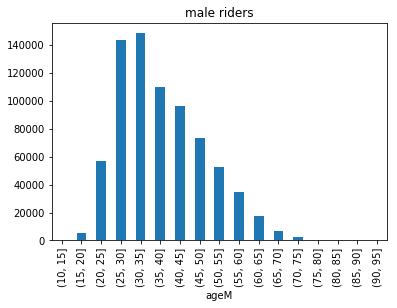

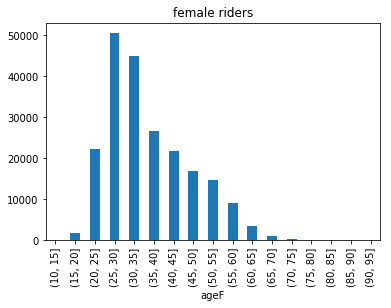

In [30]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(10, 99, 5)
axM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders");


## Figure 1: Distribution of Riders' Ages by Gender
*Distribution of both male and female riders are right skewed with most riders falling between 25 and 35 years old. Both distributions display strong kurtosis, although slightly more so for women. There are a number of ways that this can be interpreted. These results could suggest that after age 35, both men and women opt for less physically demanding methods of commuting or that they have saved enough money to afford their own bike or car. Another interpretation could be that younger riders between the ages of 25 and 35 are more open to the relatively new concept of bikesharing and therefore more likely to adopt it.*

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

          count_nonzero
ageM                   
(10, 15]       0.000000
(15, 20]       0.001407
(20, 25]       0.028775
(25, 30]       0.072573
(30, 35]       0.083719
(35, 40]       0.061207
(40, 45]       0.034004
(45, 50]       0.015213
(50, 55]       0.014408
(55, 60]       0.011331
(60, 65]       0.004669
(65, 70]       0.001290
(70, 75]       0.000350
(75, 80]       0.000124
(80, 85]       0.000088
(85, 90]       0.000108
(90, 95]       0.000000


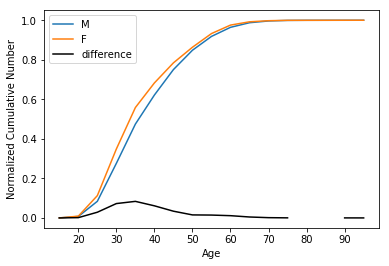

In [31]:
#print df.ageS, df.ageS.cumsum()

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

## Figure 2: Cumulative Distribution of CitiBike Riders' Ages by Gender

*Plotting the cumulative distributions of riders' ages by gender and the difference between them reveal that both distributions are quite similar, with some discrepancy occurring between the ages with the most riders (age 25-35).*

They look similar! But the difference gets to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated. 

Notice that there may be NaN values you are gonna have to deal with! 
You can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

In [32]:
import scipy.stats
#remember that your imports should all be at the top. I leave it here to hightlight that this package is needed at this point of the workflow

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

In [33]:
ks = scipy.stats.ks_2samp(df.ageM, df.ageF)
print (ks)

Ks_2sampResult(statistic=0.087722764972289424, pvalue=0.0)


**  FILL IN THE CELL BELOW!**

*Our KS test returns a D of 0.0877 and a p-value of 0.0, which means that we can **reject** the null hypothesis that the two samples come from the same parent distribution. This means we know that the age distributions for men and women are different from each other at a confidence level greater than 99.9999%.*

The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

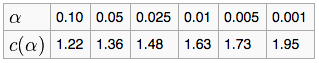

In [16]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
from IPython.display import Image
Image(filename="../plotsforclasses/ks2sample_table.png")

In [37]:
## your words here!...
## this cell is for you to redo the test with reducted dataset 
## and tell me what the scipy ks test returned and what it means in terms of NULL HYPOTHESIS
ksReduct = scipy.stats.ks_2samp(np.random.choice(df.ageM, size=200, replace=False), np.random.choice(df.ageF, size=200, replace=False))
print(ksReduct)

Ks_2sampResult(statistic=0.17999999999999999, pvalue=0.0025857469573633187)


*For the reduced sample, we can **still reject** the null hypothesis that the two samples come from the same parent distribution, albeit at a lower confidence level of 99.7% (p < 0.003).*

# Now retest using a test for correlation. 

That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
...

But make sure you understand how to use it! there is an option "replace" which you should think about.

# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



### Null Hypothesis: There is no correlation between the age of female CitiBike riders and the age of male CitiBike riders.

### $H_{0}: R_{(ageM, ageF)} = 0$

In [34]:
# your code here!
# wrangle the data as needed
# please perform the Pearson's test 
# and tell me what you find in terms of NULL hypothesis

ageM = np.random.choice(df['ageM'], size = 200, replace = False)
ageF = np.random.choice(df['ageF'], size = 200, replace = False)
ageM.sort()
ageF.sort()
 
scipy.stats.pearsonr(ageM, ageF)

(0.98865233593698443, 5.6368123431611138e-165)

*The Pearson's R of 0.997 shows us that the ages of male and female CitiBike riders are strongly correlated. This means that for nearly every male rider in the sample, there is a female rider of that same age.*

*We reject the null hypothesis at the significance level p < 0.001.*

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [35]:
# your code here!
# wrangle the data as needed
# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis

scipy.stats.spearmanr(ageM, ageF)

SpearmanrResult(correlation=0.99828076043388481, pvalue=6.5629101389578456e-246)

** please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??**

*Spearman's R measures how monotonic the relationship is between two ranked samples. In our case, a perfect Spearman's R of 1 would mean that the x-th oldest woman in the sample is the same age as the x-th oldest man. Similar to our finding for Pearson's R, we find that the ages of men and women are highly monotonic.*

*As in our Pearson's R test, we reject the null hypothesis at the significance level p < 0.001.*